<a href="https://colab.research.google.com/github/ajaymee06/BIGMART/blob/main/Copy_of_BIg_Mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train = pd.read_csv('Train_BigMart.csv')

In [ ]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [ ]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


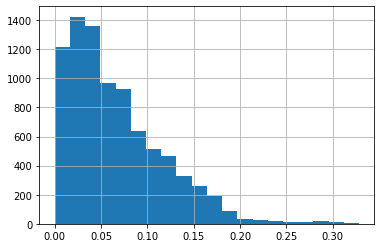

In [ ]:
train['Item_Visibility'].hist(bins=20)

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


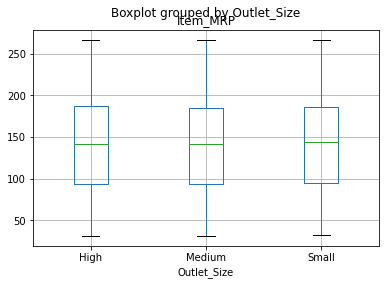

In [ ]:
train.boxplot(column='Item_MRP', by='Outlet_Size')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


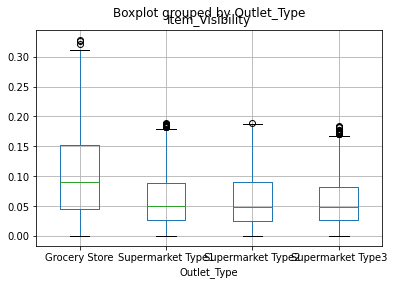

In [ ]:
train.boxplot(column='Item_Visibility', by='Outlet_Type')

In [ ]:
train['Outlet_Size'].mode()[0]

'Medium'

In [ ]:
# fill the na for outlet size with medium
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [ ]:
# fill the na for item weight with the mean of weights
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

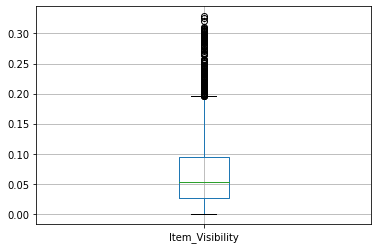

In [ ]:
train.boxplot(column='Item_Visibility')

In [ ]:
# delete the observations

Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
filt_train = train.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [ ]:
filt_train.shape, train.shape

((8379, 12), (8523, 12))

In [ ]:
train = filt_train
train.shape

(8379, 12)

In [ ]:
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [ ]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace('NaN', 'Low Viz')

In [ ]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [ ]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
#choosing the Fat content, item vizibility bins, outlet size, loc type and type for LABEL ENCODER

In [ ]:
le = LabelEncoder()

In [ ]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

In [ ]:
train['Item_Visibility_bins'] = le.fit_transform(train['Item_Visibility_bins'])

In [ ]:
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

In [ ]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

In [ ]:
# create dummies for outlet type

In [ ]:
dummy = pd.get_dummies(train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [ ]:
train = pd.concat([train, dummy], axis=1)

In [ ]:
# in linear regression that correlated features should not be present

train.corr()[((train.corr() < -0.85) | (train.corr() > 0.85)) & (train.corr() != 1)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Fat_Content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Outlet_Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility_bins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grocery Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Visibility_bins           int64
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [ ]:
# got to drop all the object types features
train = train.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [ ]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Outlet_Sales', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [ ]:
# build the linear regression model
X = train.drop('Item_Outlet_Sales', axis=1)
y = train.Item_Outlet_Sales

In [ ]:
test = pd.read_csv('Test_BigMart.csv')
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [ ]:
test['Item_Visibility_bins'] = pd.cut(test['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [ ]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [ ]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].replace('NaN', 'Low Viz')
test['Item_Visibility_bins'].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [ ]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

In [ ]:
test['Item_Visibility_bins'] = le.fit_transform(test['Item_Visibility_bins'])

In [ ]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

In [ ]:
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [ ]:
dummy = pd.get_dummies(test['Outlet_Type'])
test = pd.concat([test, dummy], axis=1)

In [ ]:
X_test = test.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [ ]:
X.columns, X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [ ]:
lin = LinearRegression()

In [ ]:
lin.fit(X, y)
predictions = lin.predict(X_test)

In [ ]:
# # create submission file
# submission = pd.DataFrame(data=[], columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
# submission['Item_Identifier'] = test['Item_Identifier']
# submission['Outlet_Identifier'] = test['Outlet_Identifier']
# submission['Item_Outlet_Sales'] = predictions
# submission.to_csv('submission.csv', index=False)
# submission.head()

In [ ]:
# my first score was 1203 points - Linear regression only

In [ ]:
# decision tree
dtree_class = DecisionTreeClassifier(criterion='gini', max_depth=25)
y = y.astype(int)

In [ ]:
dtree_class.fit(X, y)

DecisionTreeClassifier(max_depth=25)

In [ ]:
accuracy_score(y, dtree_class.predict(X))

0.985797827903091

In [ ]:
r2_score(y, dtree_class.predict(X))

0.9765275470722744

In [ ]:
pred = dtree_class.predict(X_test)
pred

array([1693, 1062,  484, ..., 2607, 3020, 1467])

In [ ]:
# # create submission file
# submission = pd.DataFrame(data=[], columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
# submission['Item_Identifier'] = test['Item_Identifier']
# submission['Outlet_Identifier'] = test['Outlet_Identifier']
# submission['Item_Outlet_Sales'] = pred
# submission.to_csv('submission.csv', index=False)
# submission.head()

In [ ]:
# score was 1712 points - Decision Tree Classifier!!!

In [ ]:
dtree_reg = DecisionTreeRegressor(criterion='mse', max_depth=10)

In [ ]:
dtree_reg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=10)

In [ ]:
pred = dtree_reg.predict(X_test)
pred

array([1683.86774194, 1283.09466019,  597.94545455, ..., 1808.80246914,
       5011.77777778, 1283.09466019])

In [ ]:
# # create submission file
# submission = pd.DataFrame(data=[], columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
# submission['Item_Identifier'] = test['Item_Identifier']
# submission['Outlet_Identifier'] = test['Outlet_Identifier']
# submission['Item_Outlet_Sales'] = pred
# submission.to_csv('submission2.csv', index=False)
# submission.head()

In [ ]:
# score was 1289 points - Decision Tree Regression!!!

In [ ]:
cross_val_score(lin, X, y, cv=5, scoring='r2')

array([0.56706162, 0.54860573, 0.54348485, 0.56025067, 0.5599034 ])

In [ ]:
cross_val_score(dtree_reg, X, y, cv=5, scoring='r2')

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

array([0.53359115, 0.52490562, 0.47242163, 0.50805228, 0.54782408])

In [ ]:
# cross_val_score(dtree_class, X, y, cv=5, scoring='roc_auc') - results in an error

In [ ]:
r2_score(y, lin.predict(X))

0.5577693240960225

In [ ]:
r2_score(y, dtree_reg.predict(X))

0.6719729943820341

In [ ]:
avg_pred = (lin.predict(X) + dtree_reg.predict(X)) / 2

In [ ]:
r2_score(y, avg_pred)

0.6438390164688774

In [ ]:
wavg_pred = lin.predict(X)*0.1 + dtree_reg.predict(X)*0.9

In [ ]:
r2_score(y, wavg_pred)

0.6709810559561786

In [ ]:
rmf = RandomForestClassifier(n_estimators=100, max_depth=10)

In [ ]:
rmf.fit(X, y)

RandomForestClassifier(max_depth=10)

In [ ]:
r2_score(y, rmf.predict(X))

0.6487111258192362

In [ ]:
accuracy_score(y, rmf.predict(X))

0.6010263754624657